In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn

import torch.nn.functional as F
import numpy as np

import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset, DataLoader
import glob

from torchvision import datasets, transforms
from src.models import linear_vanilla_vae, denoising_vanilla_vae
from src.features import dataLoader as MyDataLoader

from src.features import utils
import pathlib
import PIL
from torchvision.transforms import ToTensor, ToPILImage

import matplotlib.pyplot as plt
import yaml

import json
from math import log10, sqrt
import os

# PSNR Plot Across One Experiment

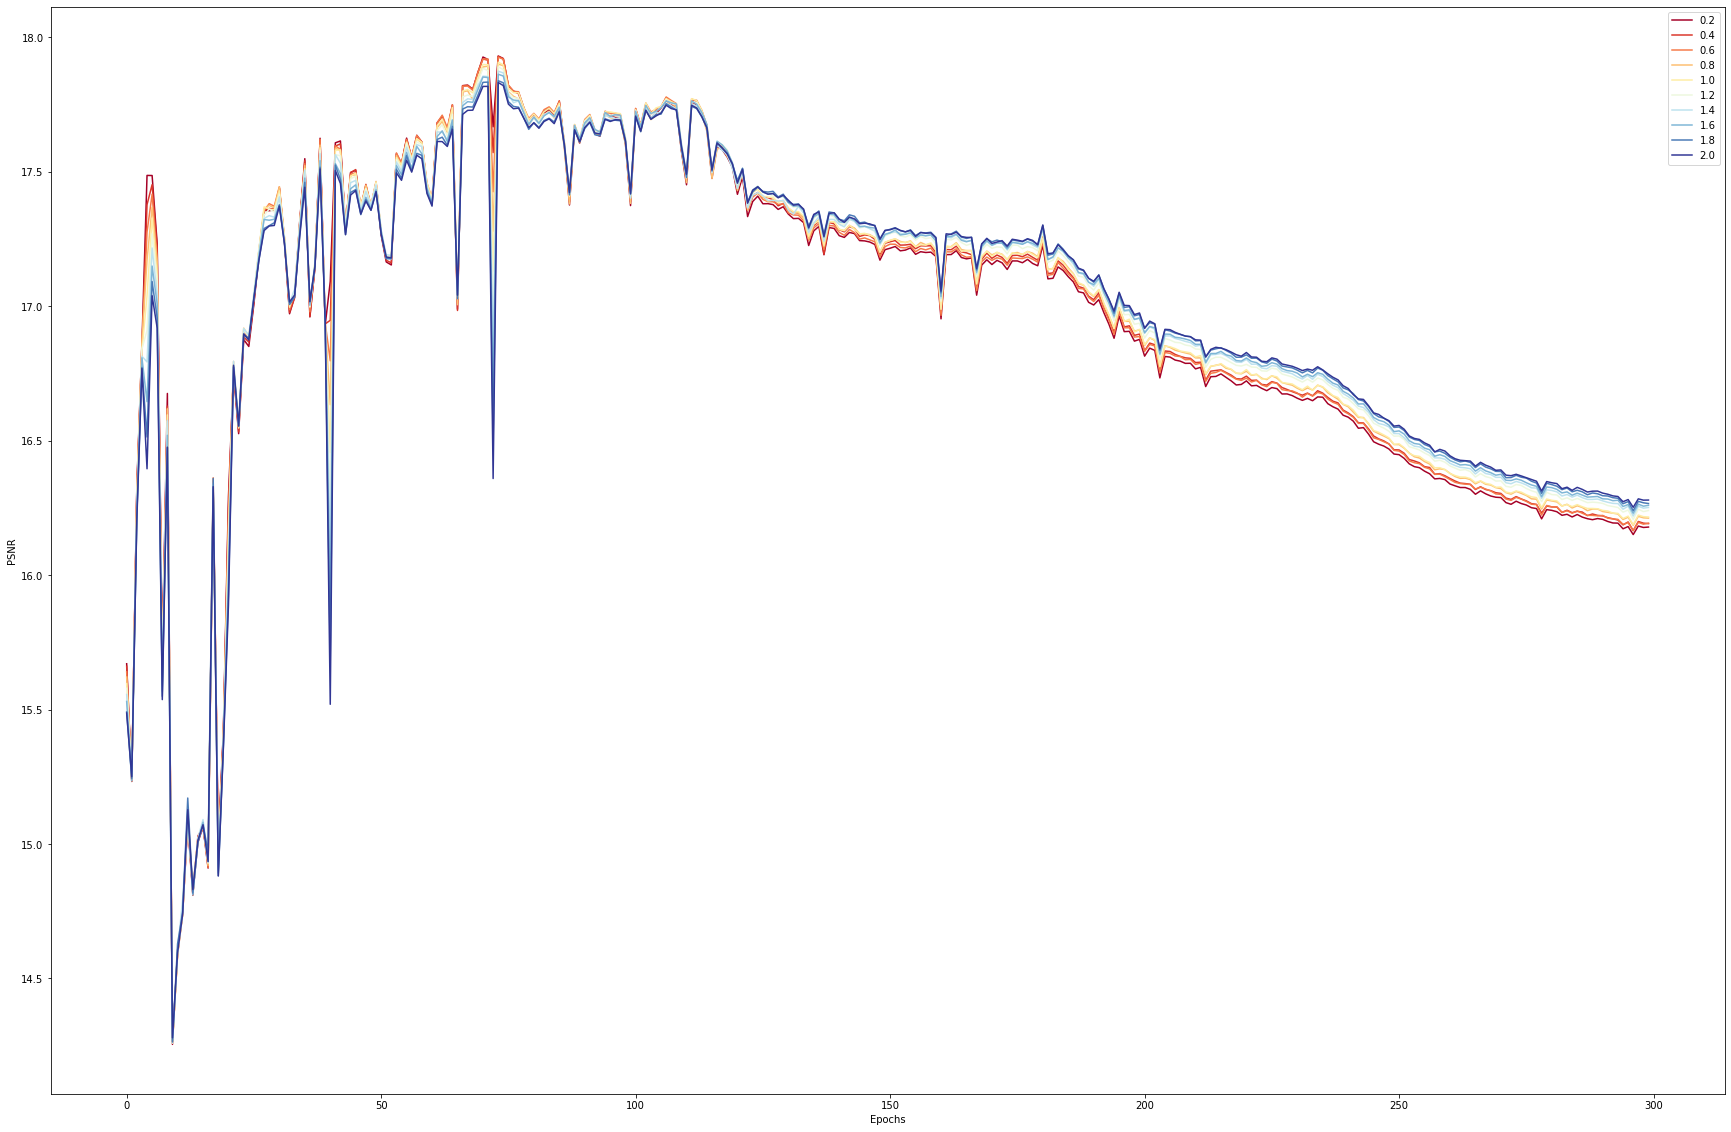

In [152]:
directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v2/exp_13/plots/"
sequence = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
fig1 = plt.figure(figsize=(30,20))
ax1 = fig1.add_subplot(111)
#ax1.set_yticks(np.arange(14.0, 17.0, .1))
for i in sequence:
    data = np.load(directory_path + str(i) + "psnr_data.npy")
    ax1.plot(data,label=i)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("PSNR")
colormap = plt.cm.RdYlBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
ax1.legend()

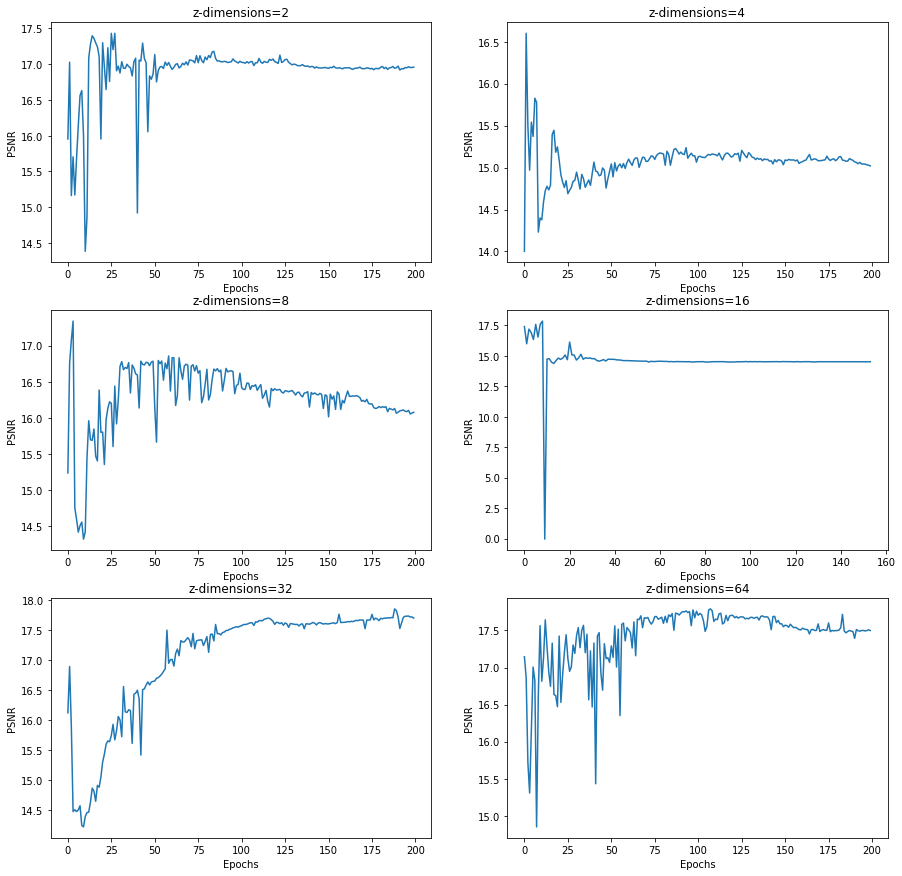

In [11]:
exp = ["14", "15", "01", "03", "05", "07"]
z_dim = ["2", "4", "8", "16", "32", "64"]
x=[0, 0, 1, 1, 2, 2]
y=[0, 1, 0, 1, 0, 1]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
for h, i, j, k in zip(x, y, exp, z_dim):
    directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v3/exp_" + j + "/plots/"
    data = np.load(directory_path + "1.0psnr_data.npy")
    ax[h, i].plot(data)
    ax[h, i].title.set_text("z-dimensions=" + k)
    ax[h, i].set_xlabel("Epochs")
    ax[h, i].set_ylabel("PSNR")
plt.show()

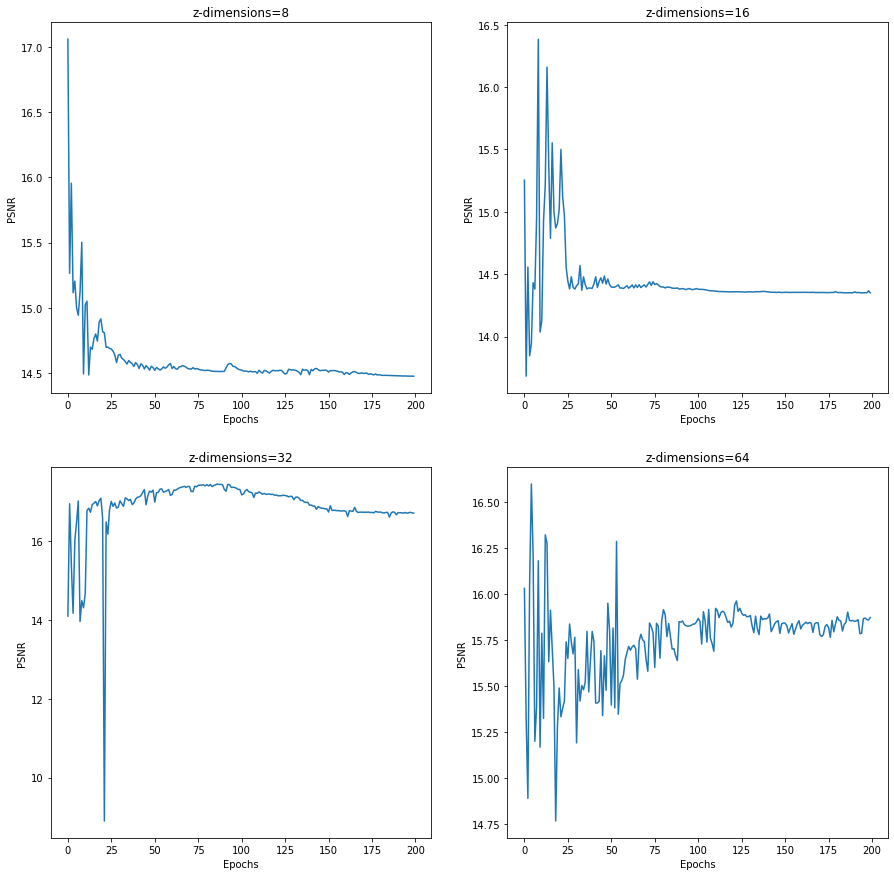

In [147]:
exp = ["02", "04", "06", "08"]
z_dim = ["8", "16", "32", "64"]
x=[0, 0, 1, 1]
y=[0, 1, 0, 1]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for h, i, j, k in zip(x, y, exp, z_dim):
    directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v3/exp_" + j + "/plots/"
    data = np.load(directory_path + "2.0psnr_data.npy")
    ax[h, i].plot(data)
    ax[h, i].title.set_text("z-dimensions=" + k)
    ax[h, i].set_xlabel("Epochs")
    ax[h, i].set_ylabel("PSNR")
plt.show()

## For Plain and Gaussian

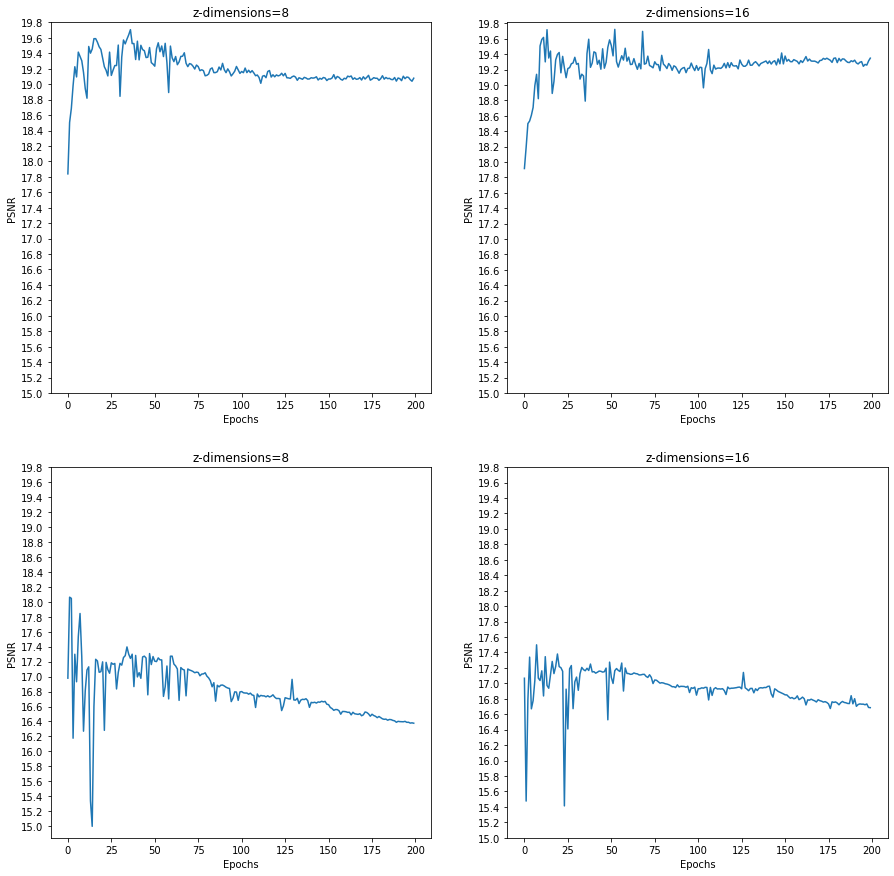

In [13]:
exp = ["09", "10", "11", "12"]
z_dim = ["8", "16", "8", "16"]
x=[0, 0, 1, 1]
y=[0, 1, 0, 1]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for h, i, j, k in zip(x, y, exp, z_dim):
    directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v2/exp_" + j + "/plots/"
    data = np.load(directory_path + "1.0psnr_data.npy")
    ax[h, i].plot(data)
    ax[h, i].set_yticks(np.arange(15.0, 20.0, .2))
    ax[h, i].title.set_text("z-dimensions=" + k)
    ax[h, i].set_xlabel("Epochs")
    ax[h, i].set_ylabel("PSNR")
plt.show()

# Loss Plots

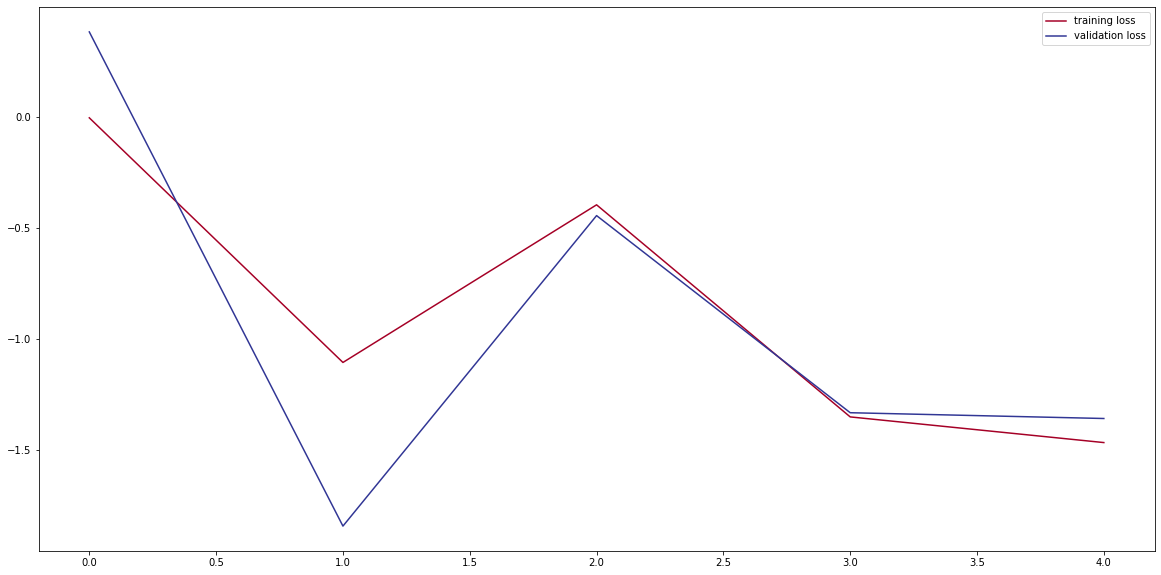

In [2]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
#ax1.set_yticks(np.arange(14.0, 17.0, .1))
directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v4/exp_14/plots/"
data = np.load(directory_path + "train_loss.npy")
ax1.plot(data,label='training loss')
data = np.load(directory_path + "val_loss.npy")
ax1.plot(data,label='validation loss')
colormap = plt.cm.RdYlBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
ax1.legend()

## For Plain and Gaussian

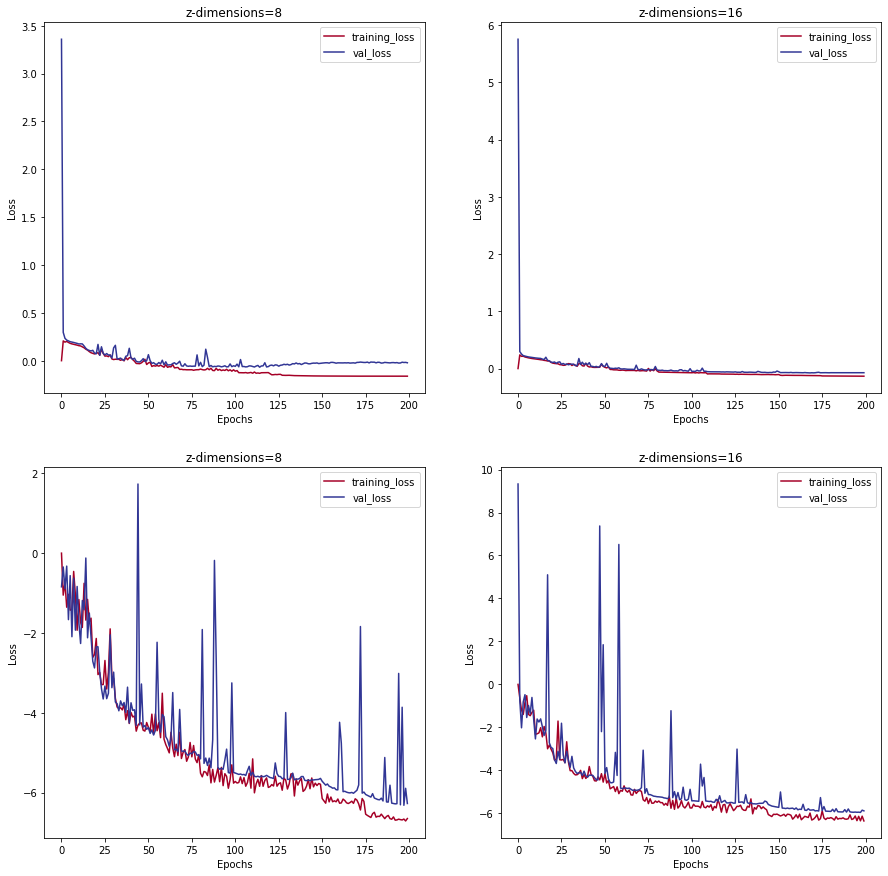

In [153]:
exp = ["09", "10", "11", "12"]
z_dim = ["8", "16", "8", "16"]
x=[0, 0, 1, 1]
y=[0, 1, 0, 1]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for h, i, j, k in zip(x, y, exp, z_dim):
    directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v2/exp_" + j + "/plots/"
    data = np.load(directory_path + "train_loss.npy")
    ax[h, i].plot(data,label="training_loss")
    data = np.load(directory_path + "val_loss.npy")
    ax[h, i].plot(data,label="val_loss")
    ax[h, i].title.set_text("z-dimensions=" + k)
    ax[h, i].set_xlabel("Epochs")
    ax[h, i].set_ylabel("Loss")
    colormap = plt.cm.RdYlBu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0, 1,len(ax[h, i].lines))]
    for a,b in enumerate(ax[h, i].lines):
        b.set_color(colors[a])
    ax[h, i].legend()
plt.show()

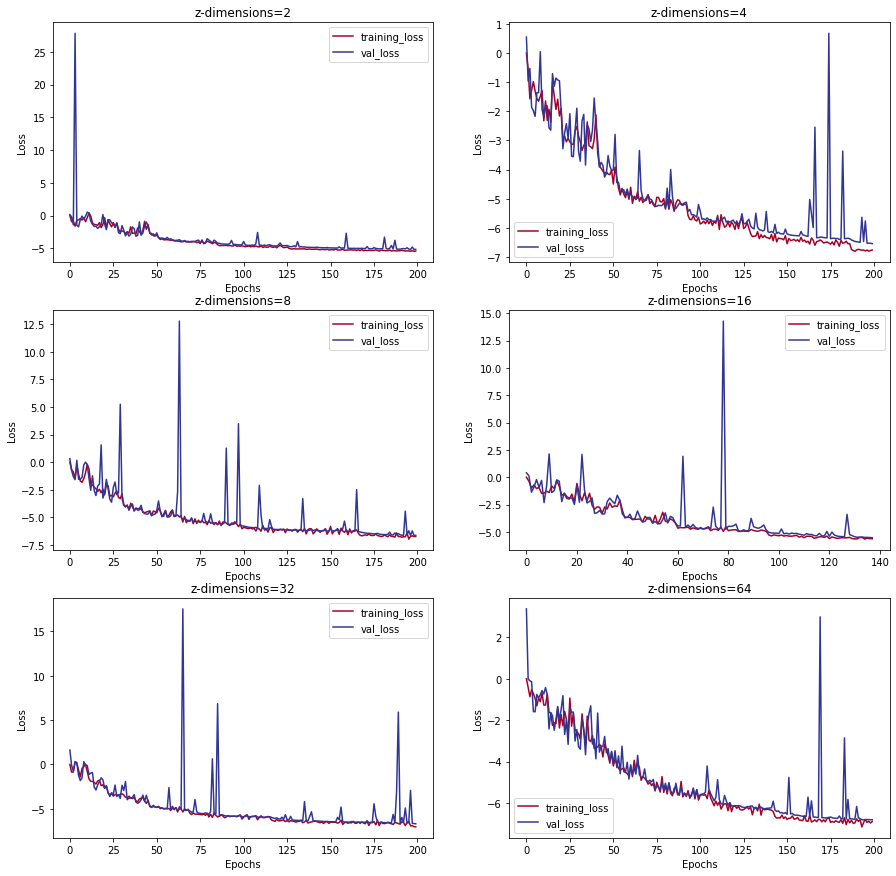

In [65]:
exp = ["14", "15", "01", "03", "05", "07"]
z_dim = ["2", "4", "8", "16", "32", "64"]
x=[0, 0, 1, 1, 2, 2]
y=[0, 1, 0, 1, 0, 1]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
for h, i, j, k in zip(x, y, exp, z_dim):
    directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v3/exp_" + j + "/plots/"
    data = np.load(directory_path + "train_loss.npy")
    ax[h, i].plot(data,label="training_loss")
    data = np.load(directory_path + "val_loss.npy")
    ax[h, i].plot(data,label="val_loss")
    ax[h, i].title.set_text("z-dimensions=" + k)
    ax[h, i].set_xlabel("Epochs")
    ax[h, i].set_ylabel("Loss")
    colormap = plt.cm.RdYlBu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0, 1,len(ax[h, i].lines))]
    for a,b in enumerate(ax[h, i].lines):
        b.set_color(colors[a])
    ax[h, i].legend()
plt.show()

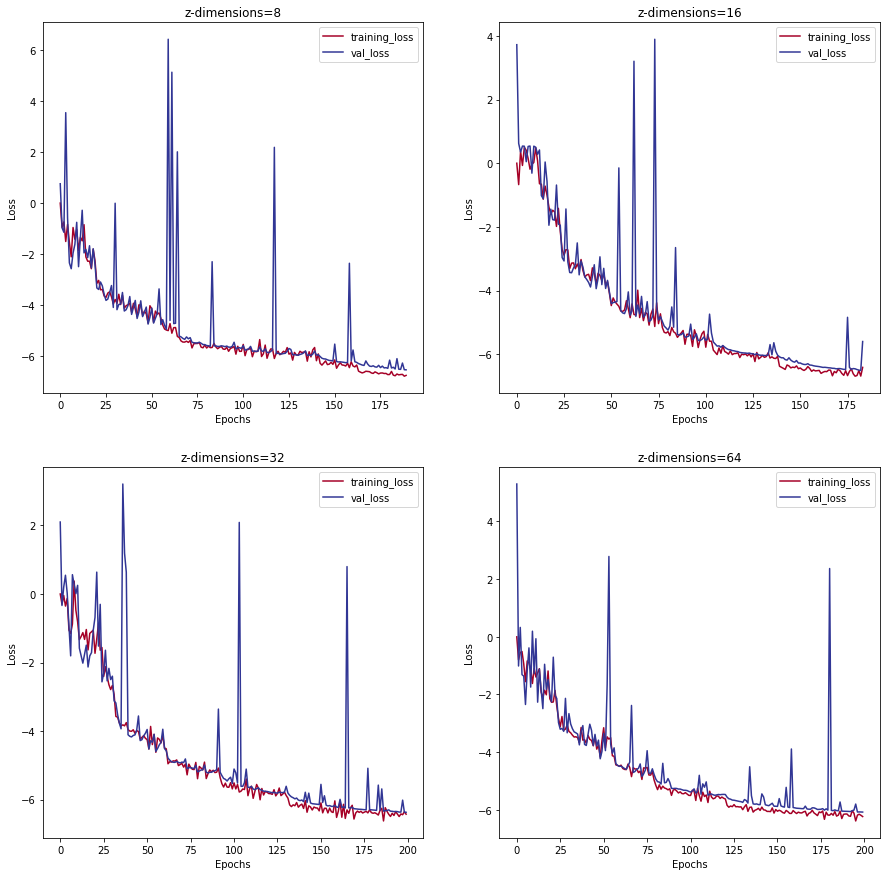

In [66]:
exp = ["02", "04", "06", "08"]
z_dim = ["8", "16", "32", "64"]
x=[0, 0, 1, 1]
y=[0, 1, 0, 1]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for h, i, j, k in zip(x, y, exp, z_dim):
    directory_path = "/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline_v3/exp_" + j + "/plots/"
    data = np.load(directory_path + "train_loss.npy")
    ax[h, i].plot(data,label='training_loss')
    data = np.load(directory_path + "val_loss.npy")
    ax[h, i].plot(data,label='val_loss')
    ax[h, i].title.set_text("z-dimensions=" + k)
    ax[h, i].set_xlabel("Epochs")
    ax[h, i].set_ylabel("Loss")
    colormap = plt.cm.RdYlBu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0, 1,len(ax[h, i].lines))]
    for a,b in enumerate(ax[h, i].lines):
        b.set_color(colors[a])
    ax[h, i].legend()
plt.show()

# Plot for PSNR x Exp

In [3]:
def PSNR(original, restored):
    mse = np.mean((original - restored) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = max(np.unique(restored))
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def load_config(config_name):
    with open(config_name) as file:
        config_file = yaml.safe_load(file)

    return config_file

In [4]:
def evaluate(test_image_sequence, image_path, checkpoints_path):
    ground_truth = utils.image_transform(
        images_paths_list=[image_path],
        transform=False,
        seed=config_file["seed"]
    )[0]
    psnr_list = []
    for sequence in test_image_sequence:
        test_image = utils.image_transform(
            images_paths_list=[image_path],
            particle_noise_density=sequence,
            transform=True,
            seed=config_file["seed"]
        )[0]

        width, height = test_image.size
        image_sample = ToTensor()(test_image).view(1,1,height,width).cuda()
        models_list_length = sorted(pathlib.Path(checkpoints_path).rglob("*.net"))
        net = torch.load(models_list_length[-1])

        output = utils.predictMMSE(image_sample, 10, net, size=(height, width))
        psnr_list.append(PSNR(ground_truth, output))

    return psnr_list


In [5]:
exp = ["14", "15", "01", "03", "05", "07"]
z_dim = ["2", "4", "8", "16", "32", "64"]
#exp = ["02", "04", "06", "08"]
#z_dim = ["8", "16", "32", "64"]
sequence = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
directory_path = "/home/fahad/master_thesis/vanilla_vae/experiments/"

In [6]:
exp_list = []
for exp_no in exp:
    exp_name = "exp_" + exp_no
    config_file = load_config(directory_path + exp_name + ".yaml")
    checkpoints_path = os.path.join(config_file["save_default_path"], config_file["title"]) + "/checkpoints/"
    plots_path = os.path.join(config_file["save_default_path"], config_file["title"]) + "/plots/"
    images_folder_path = pathlib.Path(config_file["data_directory"]) / "val"
    image_path = utils.load_paths(
        data_directory=images_folder_path,
        n_samples=101,
    )[100]
    exp_list.append(evaluate(sequence, image_path, checkpoints_path))

/home/fahad/miniconda3/envs/vanilla_vae/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# For 1x

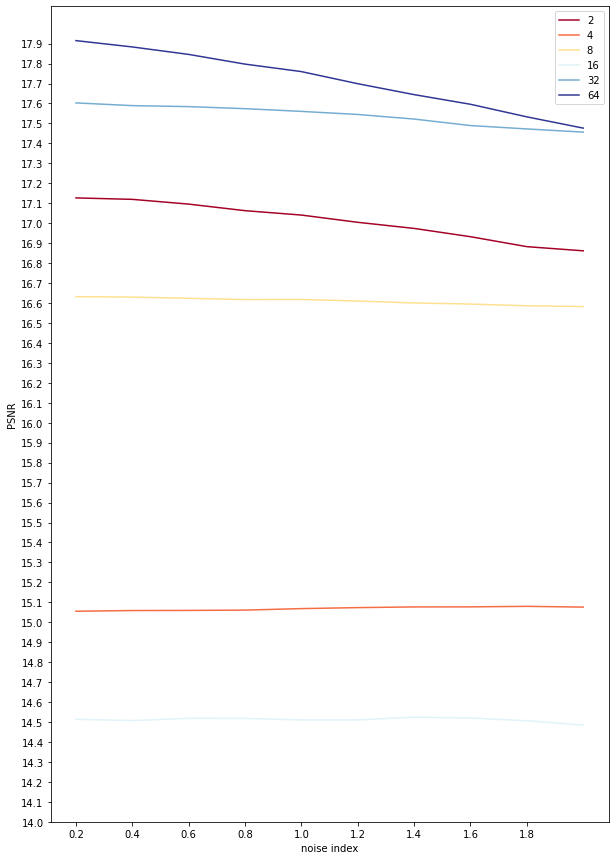

In [7]:
fig1 = plt.figure(figsize=(10,15))
ax1 = fig1.add_subplot(111)
#ax1.set_yticks(np.arange(14.0, 17.0, .1))
for i, j in zip(exp_list, z_dim):
    #ax1.scatter(sequence, np.array(i))
    ax1.plot(sequence, np.array(i), label=str(j))
ax1.set_xlabel("noise index")
ax1.set_ylabel("PSNR")
ax1.set_xticks(np.arange(0.2, 2.0, 0.2))
ax1.set_yticks(np.arange(14.0, 18.0, 0.1))
colormap = plt.cm.RdYlBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
ax1.legend()

# For 2x

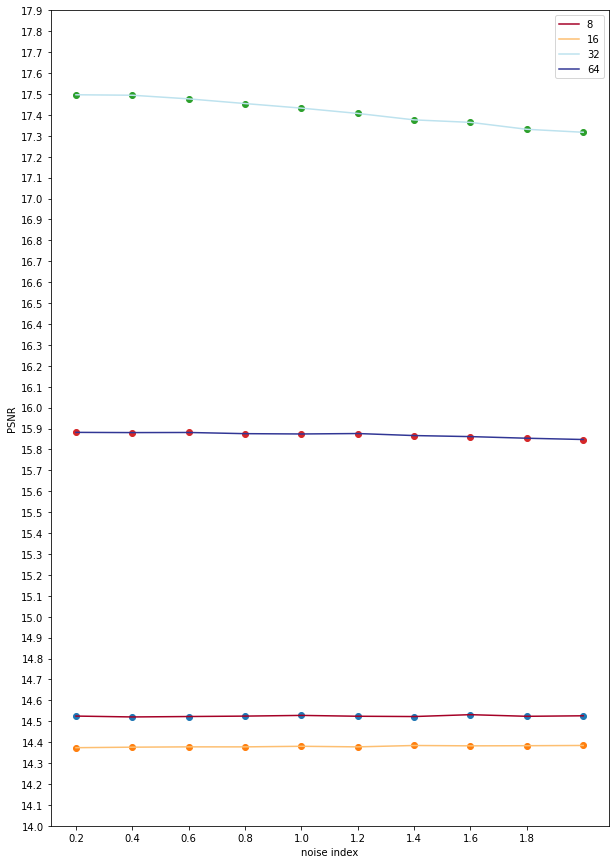

In [140]:
fig1 = plt.figure(figsize=(10,15))
ax1 = fig1.add_subplot(111)
#ax1.set_yticks(np.arange(14.0, 17.0, .1))
for i, j in zip(exp_list, z_dim):
    ax1.scatter(sequence, np.array(i))
    ax1.plot(sequence, np.array(i), label=str(j))
ax1.set_xlabel("noise index")
ax1.set_ylabel("PSNR")
ax1.set_xticks(np.arange(0.2, 2.0, 0.2))
ax1.set_yticks(np.arange(14.0, 18.0, 0.1))
colormap = plt.cm.RdYlBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
ax1.legend()

In [143]:
images_folder_path = pathlib.Path("/home/fahad/master_thesis/vanilla_vae/data/raw/simulated_clean_templates/") / "val"
image_path = utils.load_paths(
    data_directory=images_folder_path,
    n_samples=101,
)[100]
ground_truth = utils.image_transform(
    images_paths_list=[image_path],
    transform=False,
    seed=config_file["seed"]
)[0]

test_image = utils.image_transform(
    images_paths_list=[image_path],
    particle_noise_density=2.0,
    transform=True,
    seed=config_file["seed"]
)[0]

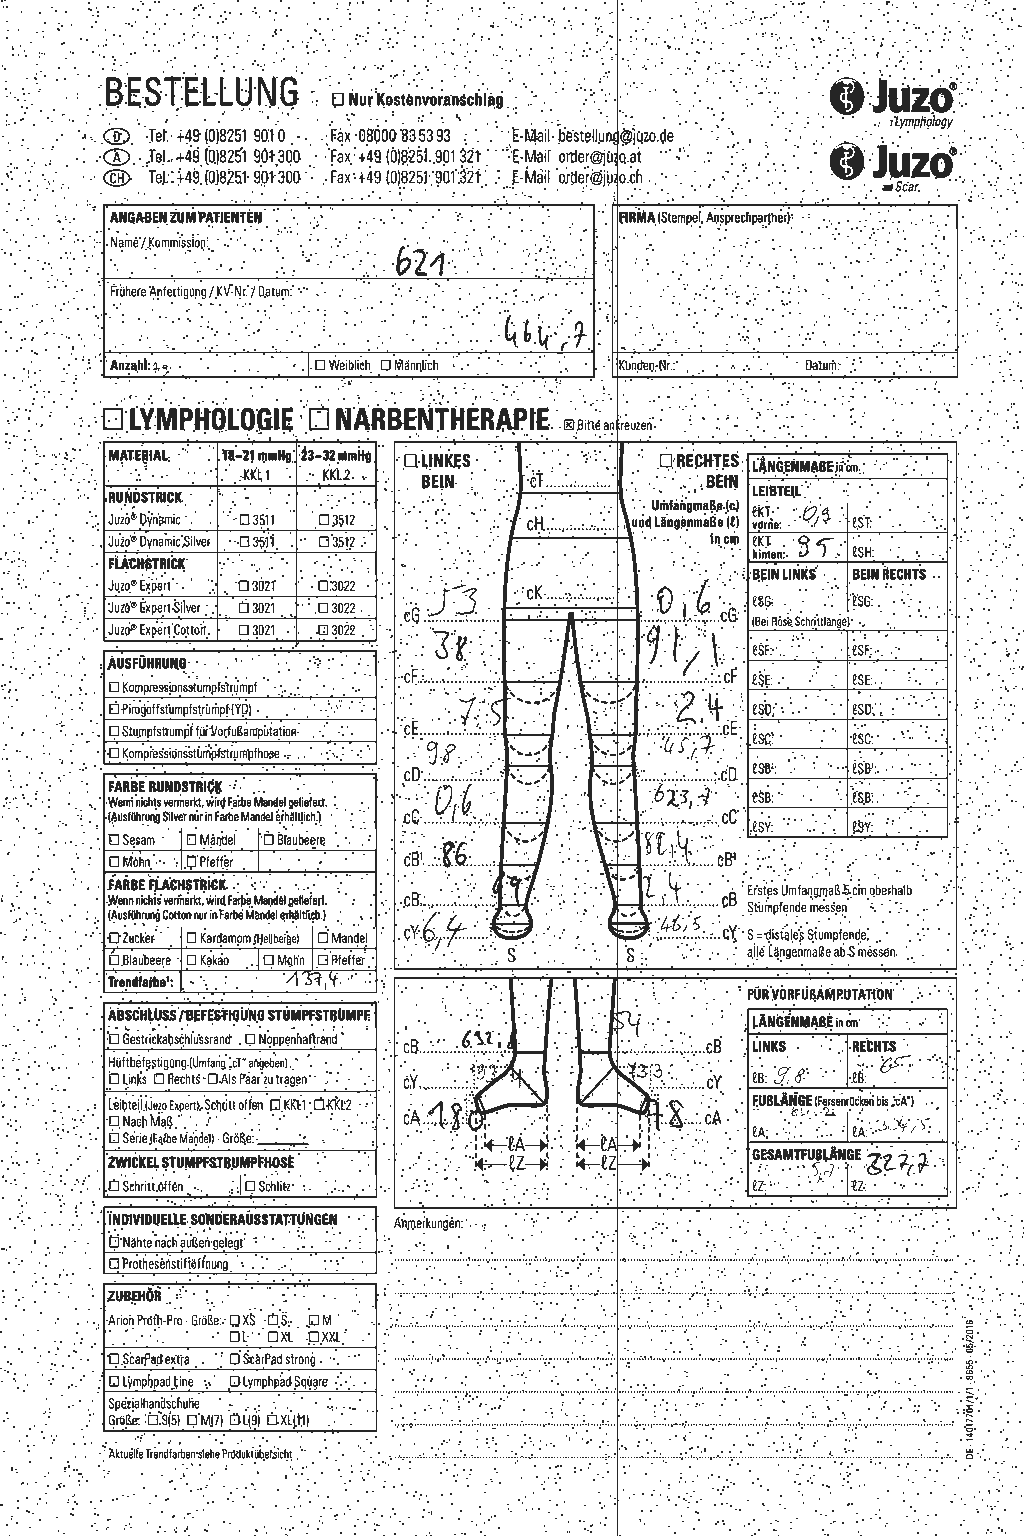

In [144]:
test_image